In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from pandas import DataFrame
from datetime import datetime,tzinfo
from pytz import timezone
import time
import pytz
import csv
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('crypto-markets.csv')
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [3]:
bitcoin = df[(df['name'] == 'Bitcoin') & (df['volume'] != 0)]
bitcoin.shape

(1799, 13)

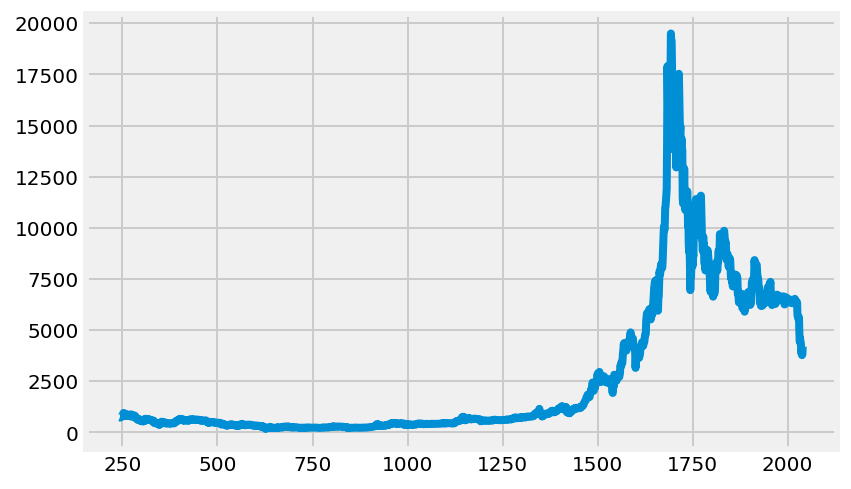

In [4]:
plt.plot(bitcoin['close'])

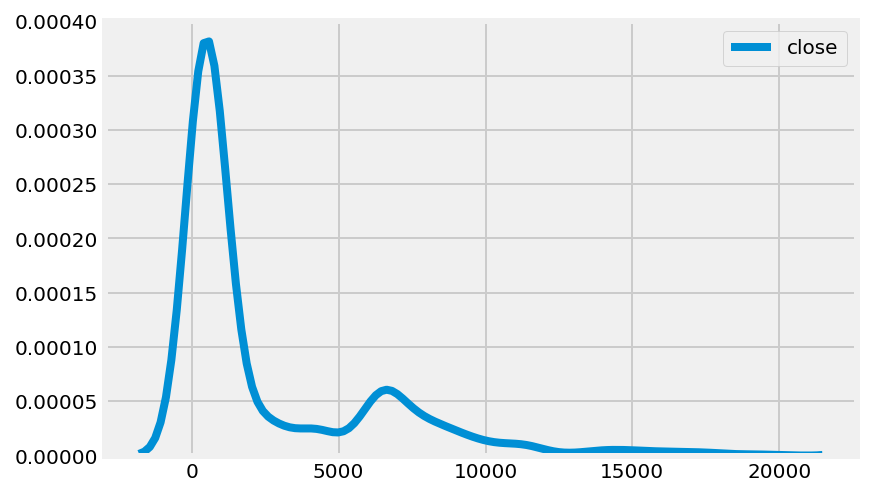

In [5]:
sns.kdeplot(bitcoin['close'])

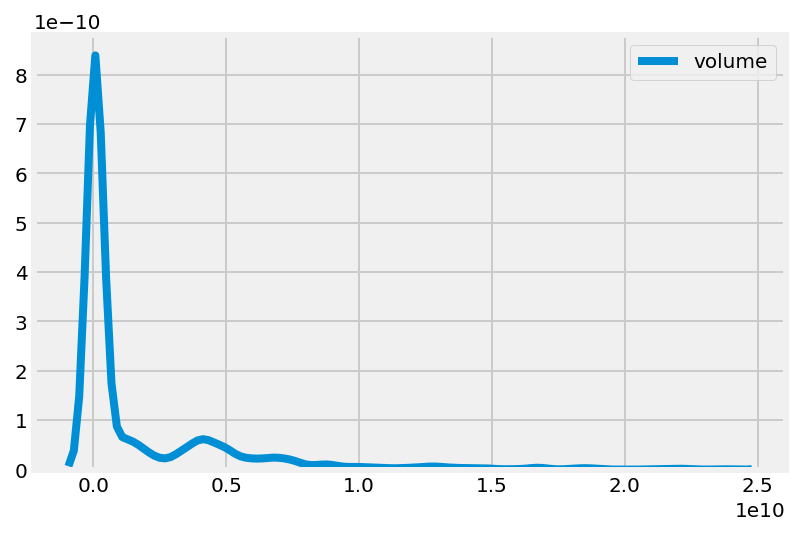

In [6]:
sns.kdeplot(bitcoin['volume'])

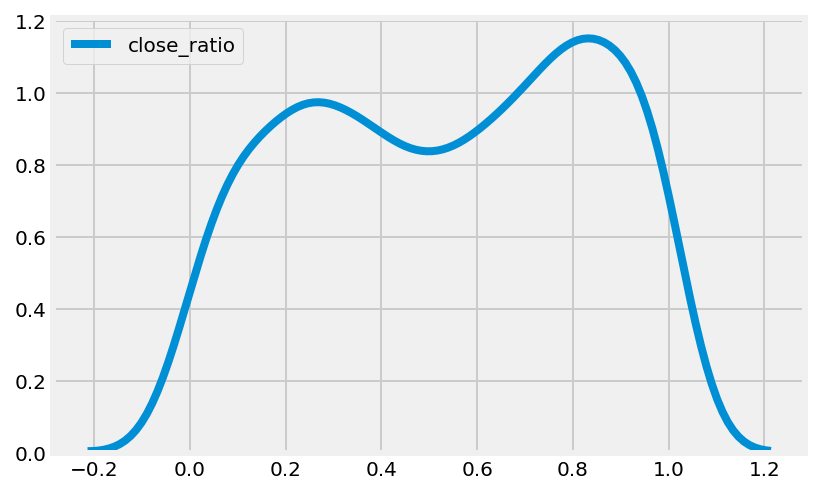

In [7]:
sns.kdeplot(bitcoin['close_ratio'])

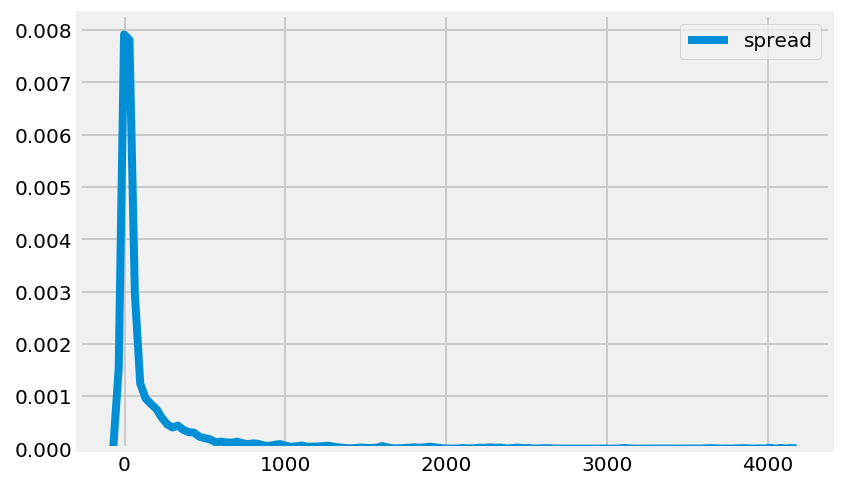

In [8]:
sns.kdeplot(bitcoin['spread'])

In [9]:
bitcoin.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
243,bitcoin,BTC,Bitcoin,2013-12-27,1,763.28,777.51,713.60,735.07,46862700.0,8.955395e+09,0.3359,63.91
244,bitcoin,BTC,Bitcoin,2013-12-28,1,737.98,747.06,705.35,727.83,32505800.0,8.869919e+09,0.5390,41.71
245,bitcoin,BTC,Bitcoin,2013-12-29,1,728.05,748.61,714.44,745.05,19011300.0,9.082104e+09,0.8958,34.17
246,bitcoin,BTC,Bitcoin,2013-12-30,1,741.35,766.60,740.24,756.13,20707700.0,9.217168e+09,0.6028,26.36
247,bitcoin,BTC,Bitcoin,2013-12-31,1,760.32,760.58,738.17,754.01,20897300.0,9.191325e+09,0.7068,22.41


In [10]:
bitcoin.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,1799.0,1799.000000,1799.000000,1799.000000,1799.000000,1.799000e+03,1.799000e+03,1799.000000,1799.000000
mean,1.0,2561.064069,2637.460067,2474.643702,2562.815481,1.646021e+09,4.256929e+10,0.536950,162.816365
std,0.0,3574.098055,3705.964702,3412.729018,3573.821245,3.191497e+09,6.083674e+10,0.300733,375.938702
min,1.0,176.900000,211.730000,171.510000,178.100000,2.857830e+06,2.444379e+09,0.000000,1.030000
25%,1.0,390.615000,402.275000,380.665000,390.000000,2.625100e+07,5.609891e+09,0.269800,8.235000
50%,1.0,631.880000,642.100000,622.400000,632.000000,7.358860e+07,9.546133e+09,0.555800,22.390000
75%,1.0,4127.225000,4244.350000,3960.795000,4141.165000,1.819985e+09,6.865241e+10,0.805950,143.020000
max,1.0,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.265025e+11,1.000000,4110.400000


In [11]:
bitcoin.isna().sum() / len(bitcoin)

slug           0.0
symbol         0.0
name           0.0
date           0.0
ranknow        0.0
open           0.0
high           0.0
low            0.0
close          0.0
volume         0.0
market         0.0
close_ratio    0.0
spread         0.0
dtype: float64

In [12]:
price=bitcoin['close']
windows = list(range(2, 32)) 
# Calculate the sd and volatility
for window in windows:
    #Shifted calcuations (ie not including the current day for calculations of the mean)
    mean = price.shift().rolling(window).mean()
    sd = price.shift().rolling(window).std()
    #vol = price.shift().rolling(window).std() * np.sqrt(window) 
    
    bitcoin[str(window) + ' Day Shifted Rolling Mean'] = mean
    #bitcoin[str(window) + ' Day Shifted Volatility'] = vol
    bitcoin[str(window) + ' Day Shifted SD'] = sd
    
    #Regular calcuations (ie including the current day for the mean)
    mean = price.rolling(window).mean()
    sd = price.rolling(window).std()
    #vol = price.rolling(window).std() * np.sqrt(window) 
    
    bitcoin[str(window) + ' Day Rolling Mean'] = mean
    #bitcoin[str(window) + ' Day Volatility'] = vol
    bitcoin[str(window) + ' Day SD'] = sd 

In [13]:
synthetic_col_names = bitcoin.columns[13:133]
bitcoin[synthetic_col_names].head(10)

,2 Day Shifted Rolling Mean,2 Day Shifted SD,2 Day Rolling Mean,2 Day SD,3 Day Shifted Rolling Mean,3 Day Shifted SD,3 Day Rolling Mean,3 Day SD,4 Day Shifted Rolling Mean,4 Day Shifted SD,...,29 Day Rolling Mean,29 Day SD,30 Day Shifted Rolling Mean,30 Day Shifted SD,30 Day Rolling Mean,30 Day SD,31 Day Shifted Rolling Mean,31 Day Shifted SD,31 Day Rolling Mean,31 Day SD
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,NaN,NaN,731.450,5.119453,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,731.450,5.119453,736.440,12.176379,NaN,NaN,735.983333,8.646255,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,736.440,12.176379,750.590,7.834743,735.983333,8.646255,743.003333,14.260580,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,750.590,7.834743,755.070,1.499066,743.003333,14.260580,751.730000,5.881360,741.0200,12.300835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,755.070,1.499066,762.705,12.296587,751.730000,5.881360,760.513333,9.487530,745.7550,12.878772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,762.705,12.296587,786.895,21.913239,760.513333,9.487530,775.933333,24.506518,756.6475,10.944747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,786.895,21.913239,810.555,11.547054,775.933333,24.506518,797.503333,24.035499,770.9825,22.325381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,810.555,11.547054,839.115,28.842886,797.503333,24.035499,826.873333,29.419912,786.6300,29.292564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,839.115,28.842886,896.520,52.340044,826.873333,29.419912,870.586667,58.200975,813.0050,36.692554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
bitcoin.shape

(1799, 133)

In [15]:
#Fill in the NaN values for the first window - 1 entries in each window column
for i in np.arange(13,133):
    col_name = bitcoin.columns[i]
    bitcoin[col_name].fillna(bitcoin[col_name].unique()[1], inplace=True)

In [16]:
bitcoin[synthetic_col_names].head(20)

,2 Day Shifted Rolling Mean,2 Day Shifted SD,2 Day Rolling Mean,2 Day SD,3 Day Shifted Rolling Mean,3 Day Shifted SD,3 Day Rolling Mean,3 Day SD,4 Day Shifted Rolling Mean,4 Day Shifted SD,...,29 Day Rolling Mean,29 Day SD,30 Day Shifted Rolling Mean,30 Day Shifted SD,30 Day Rolling Mean,30 Day SD,31 Day Shifted Rolling Mean,31 Day Shifted SD,31 Day Rolling Mean,31 Day SD
243,731.450,5.119453,731.450,5.119453,735.983333,8.646255,735.983333,8.646255,741.0200,12.300835,...,830.674828,55.790794,831.439333,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161
244,731.450,5.119453,731.450,5.119453,735.983333,8.646255,735.983333,8.646255,741.0200,12.300835,...,830.674828,55.790794,831.439333,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161
245,731.450,5.119453,736.440,12.176379,735.983333,8.646255,735.983333,8.646255,741.0200,12.300835,...,830.674828,55.790794,831.439333,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161
246,736.440,12.176379,750.590,7.834743,735.983333,8.646255,743.003333,14.260580,741.0200,12.300835,...,830.674828,55.790794,831.439333,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161
247,750.590,7.834743,755.070,1.499066,743.003333,14.260580,751.730000,5.881360,741.0200,12.300835,...,830.674828,55.790794,831.439333,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161
248,755.070,1.499066,762.705,12.296587,751.730000,5.881360,760.513333,9.487530,745.7550,12.878772,...,830.674828,55.790794,831.439333,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161
249,762.705,12.296587,786.895,21.913239,760.513333,9.487530,775.933333,24.506518,756.6475,10.944747,...,830.674828,55.790794,831.439333,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161
250,786.895,21.913239,810.555,11.547054,775.933333,24.506518,797.503333,24.035499,770.9825,22.325381,...,830.674828,55.790794,831.439333,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161
251,810.555,11.547054,839.115,28.842886,797.503333,24.035499,826.873333,29.419912,786.6300,29.292564,...,830.674828,55.790794,831.439333,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161
252,839.115,28.842886,896.520,52.340044,826.873333,29.419912,870.586667,58.200975,813.0050,36.692554,...,830.674828,55.790794,831.439333,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161


number of events for 7 day rolling window: 389


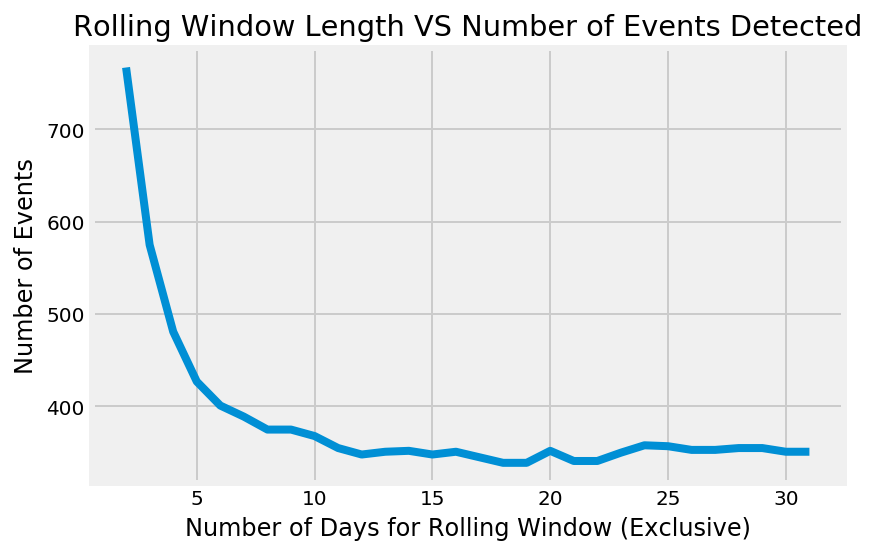

In [17]:
#Does not count the current day when calculating the rolling mean
num_events = []
close = bitcoin['close']
for window in windows:
    rolling_mean_col = bitcoin[str(window) + ' Day Shifted Rolling Mean']
    rolling_sd_col = bitcoin[str(window) + ' Day Shifted SD']
    sig_diff = np.array(abs(rolling_mean_col - close)) >= 2 * np.array(rolling_sd_col)
    num_event_detected = np.count_nonzero(sig_diff)
    num_events += [num_event_detected]
plt.plot(windows, num_events)
plt.xlabel('Number of Days for Rolling Window (Exclusive)')
plt.ylabel('Number of Events')
plt.title('Rolling Window Length VS Number of Events Detected')
print('number of events for', windows[5], 'day rolling window:', num_events[5])

number of events for 8 day rolling window: 101


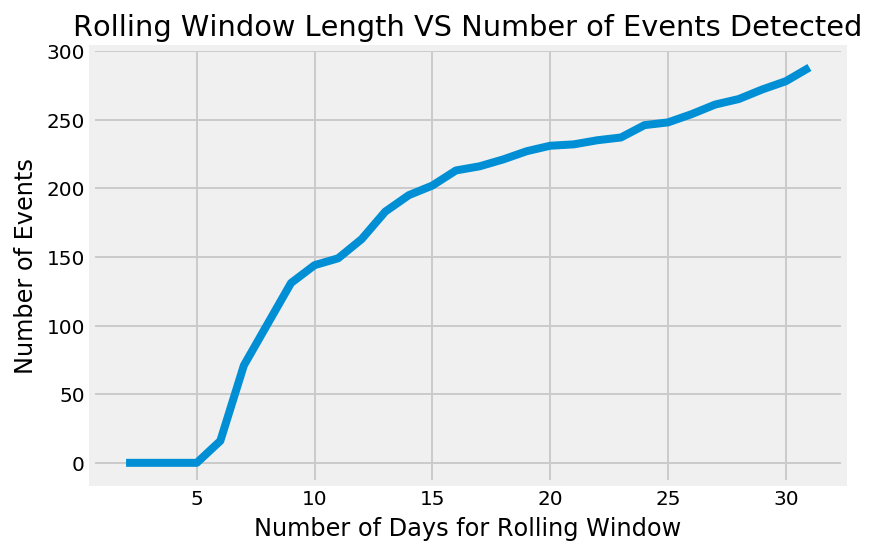

In [18]:
#Counts the current day when calculating the rolling mean
num_events2 = []
for window in windows:
    rolling_mean_col = bitcoin[str(window) + ' Day Rolling Mean']
    rolling_sd_col = bitcoin[str(window) + ' Day SD']
    diff = np.array(abs(rolling_mean_col - close)) >= 2 * np.array(rolling_sd_col)
    num_event_detected = np.count_nonzero(diff)
    num_events2 += [num_event_detected]
plt.plot(windows, num_events2)
plt.xlabel('Number of Days for Rolling Window')
plt.ylabel('Number of Events')
plt.title('Rolling Window Length VS Number of Events Detected')
print('number of events for', windows[6], 'day rolling window:', num_events2[6])

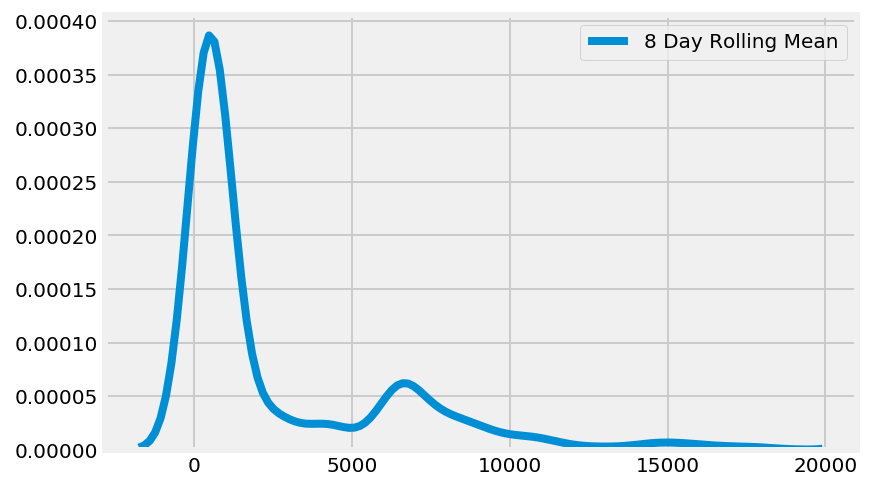

In [19]:
sns.kdeplot(bitcoin['8 Day Rolling Mean'])

In [20]:
bitcoin.to_csv('post_eda.csv')

## Results

After careful data cleaning, manipulation, feature selection, and copious trial and error, we were able to generate some pretty interesting findings through the EDA process. There are two major findings, one pertaining to the baseline definition of an event (significant price change), and the other pertaining to the data used for this analysis.

#### Baseline Definition Alterations

Initially, Paradigm suggested a simple baseline definition stating that any occurrence where the closing price for a given day differs from the two-day rolling mean by more than 2 standard deviations should be flagged as an event (significant price change). However, when utilizing this definition, 0 events were flagged in the 5 year timespan covered in Kaggle's cryptocurrency dataset on Bitcoin; this seems illogical. As such we are currently using a 7 day rolling window (the norm for stock market analysis) and a 2nd baseline definition in which a price change of greater than 10% from the previous close price is flagged as an event.

#### Data Concerns

As can be seen for the KDE density plots for many of the variables above, most of the plots do not show a desirable distribution typical of machine learning analytics. Most machine learning alogorithms assume that the variables have a normal, stationary distribution, in which case, the KDE density plots would appear as a bell curve. Otherwise, the output generated by machine learning algorithms will likely be prone to large amounts of bias. This is most likely because cryptocurrency lacked visibility in the initial dates covered in this dataset, while the later dates encompassed a huge boom in the price, which created an imbalanced dataset. Again, this could be fixed if we were to have more data, along with data on different cryptocurrencies –– this would require access to the Coinbase API data. 

#### Next Steps

There is far too little data to justify use of a neural network, but ensemble algorithms such as Random Forests (CART), Isolation Forests, and Gradient Boosting Machines could prove to be useful in this case. Alternatively, we are also looking into using K-means and other clustering algorithms for this problem. We've also discussed validating our results using ARIMA/SARIMA models and results from the other Paradigm team.  